In [1]:
import numpy as np
from numpy.random import randn
from numpy.linalg import svd

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
plt.rcParams['font.size'] = 18

In [2]:
t = np.arange(-3, 3, 0.01)

Utrue = np.array([
    np.cos(17*t) * np.exp(-t**2),
    np.sin(11*t)
]).T

Strue = np.array([
    [2,   0],
    [0, 0.5]
])

Vtrue = np.array([
    np.sin(5*t) * np.exp(-t**2), np.cos(13*t)
]).T

X = Utrue @ Strue @ Vtrue.T

# Add Gaussian noise
sigma = 1
X_noisy = X + sigma * randn(*X.shape)

U, S, VT = svd(X_noisy, full_matrices=True)
Σ = np.diag(S)

# Use hard threshold - determine r from modes w/ sig > cutoff
N = len(X_noisy)
cutoff = (4/np.sqrt(3)) * np.sqrt(N) * sigma
r = np.max(np.where(S > cutoff)) + 1
X_clean = U[:, :r] @ Σ[:r, :r] @ VT[:r]

# Use cumulative energy to find an r that captures 90% of the energy
cdS = np.cumsum(S) / S.sum() # 
r90 = np.min(np.where(cdS > 0.90)) + 1
X_90 = U[:, :r90] @ Σ[:r90, :r90] @ VT[:r90]

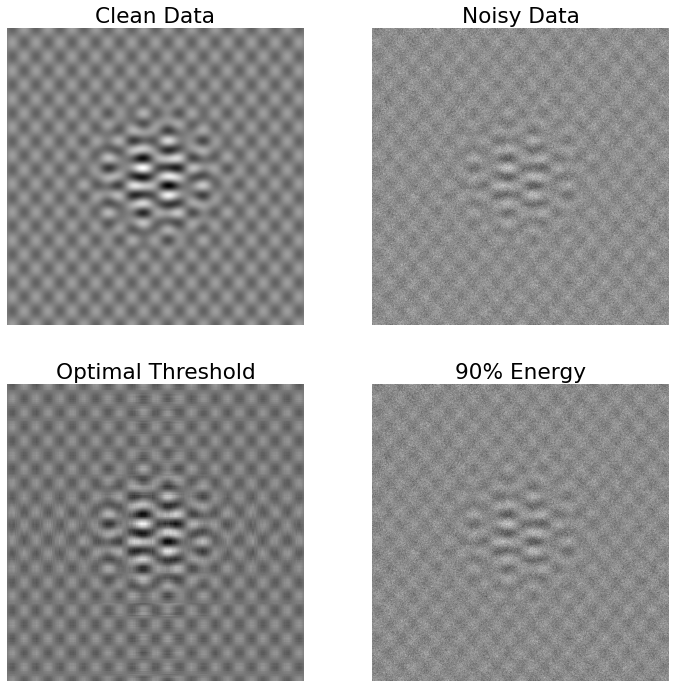

In [3]:
# Figure 1.22

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
images, titles = zip(*[
    (X, 'Clean Data'),
    (X_noisy, 'Noisy Data'),
    (X_clean, 'Optimal Threshold'),
    (X_90, '90% Energy')
])
for ax, image, title in zip(axs.flat, images, titles):
    ax.imshow(image, cmap='gray')
    ax.axis(False)
    ax.set_title(title);

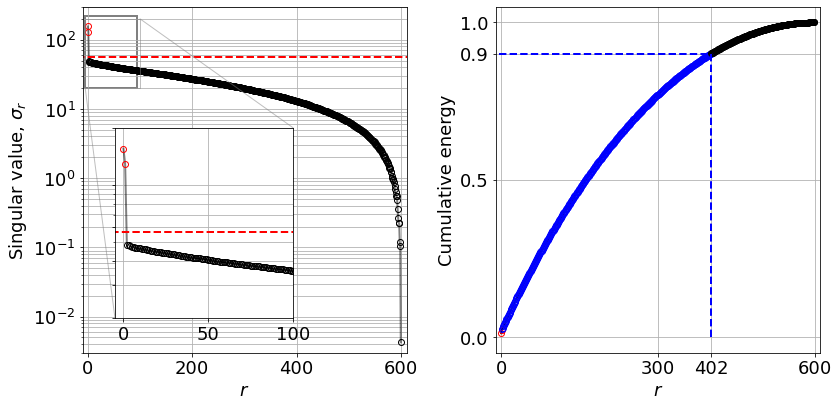

In [9]:
# Figure 1.23

# Plot Singular Values
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

ax = axs[0]
ax.semilogy(S, color='black', alpha=0.5, linewidth=2)
ax.semilogy(np.arange(r), Σ[:r, :r], 'o', color='red', mfc='none', linewidth=2)
ax.semilogy(np.arange(r, len(S)), Σ[r:, r:], 'o', color='black', mfc='none', linewidth=2)
ax.plot(np.array([-20, N+20]), np.array([cutoff, cutoff]), '--', color='red', linewidth=2)
ax.add_patch(
    Rectangle((-5, 20), 100, 200, linewidth=2, facecolor='none', edgecolor='gray')
)
ax.set_xlim((-10, 610))
ax.set_ylim((0.003, 300))
ax.grid(True, which='both')
ax.set_xlabel('$r$')
ax.set_ylabel(r'Singular value, $\sigma_r$')

axins = ax.inset_axes([0.1, 0.1, 0.55, 0.55])
axins.semilogy(S, color='black', alpha=0.5, linewidth=2)
axins.semilogy(np.arange(r), Σ[:r, :r], 'o', color='red', mfc='none', linewidth=2)
axins.semilogy(np.arange(r, len(S)), Σ[r:, r:], 'o', color='black', mfc='none', linewidth=2)
axins.plot(np.array([-20, N+20]), np.array([cutoff, cutoff]), '--', color='red' ,linewidth=2)
axins.set_xlim(-5, 100)
axins.set_ylim(20, 200)
axins.set_yticks([20, 30, 40, 60, 100, 200])
axins.set_yticklabels([])
axins.grid(True, which='both')
ax.indicate_inset_zoom(axins)


ax = axs[1]
ax.plot(cdS, '-', color='black', linewidth=2)
ax.plot(np.arange(r), cdS[:r], 'o', color='red', mfc='none')
ax.plot(np.arange(r, r90), cdS[r:r90], 'o', color='blue', mfc='none')
ax.plot(np.arange(r90, len(cdS)), cdS[r90:], 'o', color='black', mfc='none')

ax.set_xticks(np.array([0, 300, r90, 600]))
ax.set_yticks(np.array([0, 0.5, 0.9, 1]))
ax.set_xlim((-10, 610))
ax.plot(
    np.array([r90, r90, -10]), np.array([0, 0.9, 0.9]),
    '--', color='blue', linewidth=2
)
ax.grid(True)
ax.set_xlabel('$r$')
ax.set_ylabel('Cumulative energy')
plt.tight_layout()